# Lab10 Introduction to Reinforcement Learning

- Saranpat Funkaew, 58070501068

## Lab Instruction

This lab, we will implement an Q-learning agent that will solve the GridWorld problem. The objective of your agent is to maximize the reward by find the shortest path to the exit without stepping on a bomb or a cliff. The result will be compare with the randomly move agent.

### Reinforcement Learning

The reinforcement learning components:</br>
<img src='img/rl.png' width=500>

- Reinforcement Learning Blog Post (Thai): <a href="https://medium.com/asquarelab/ep-1-reinforcement-learning-%E0%B9%80%E0%B8%9A%E0%B8%B7%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B8%95%E0%B9%89%E0%B8%99-acfa9d42394c"> Thammasorn, A-Square</a></br>
- Reinforcement Learning Blog Post (Eng): <a href="http://adventuresinmachinelearning.com/reinforcement-learning-tutorial-python-keras/"> Adventures in Machine Learning</a>

### Temporal-Different Learning
**Temporal-difference (TD) learning** is a combination of **Monte Carlo** ideas and **dynamic programming (DP)** ideas.</br>
Like Monte Carlo methods, TD methods **can learn directly from raw experience without a model of the environment’s dynamics**.</br> 
Like DP, TD methods update estimates based in part on other learned estimates, **without waiting for a final outcome** (they bootstrap).</br>
The relationship between TD, DP, and Monte Carlo methods is a recurring theme in the theory of reinforcement learning

In [5]:
# Setup 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import env

### Environment - Cliff Gridworld

The environment is a Cliff Gridworld, illustrated as follows: </br>

<img src='img/grid.png' width=500></br>

The world is a 10x10 grid where the exit is at bottom right corner. The bomb is randomly generated around the exit.</br>
The agent is randomly start around the top left corner section. </br>
Each step count as -1. In other word, the more step your agent take, the more penalty you have.</br>
If your agent move against the corner, your agent will move. If your agent step to the cliff, the penalty is -20, same as stepping into a bomb which get -10 penalty.</br>
If your agent reach to the exit, you will recieve 20 reward.</br>

The episode is end when your agent found a way out and get a reward or step on a bomb and get the penalty point.</br>
Your agent is at the starting point when the new episode begin.

```env.World```</br>
>**Properties**
- height: The height of a grid world
- width: The width of a grid world
- current_location: current location of your agent.
- actions: a list of an available actions (up,down,left,right)</br>

>**Methods**
- ```available_actions()``` Get a set of available actions
- ```move_agent(action)``` Move an agent to the given direction and return a reward of that action.
- ```reset()``` Reset the state of the environment to the starting point.
- ```end_state()``` Get the end state. Return True if the state is end. False, otherwise.
- ```render()``` Show the current terran of the grid world

In [6]:
# Initialize environment
env = env.World()

### Define Random Agent

Define an agent that walk randomly.

In [57]:
# Define Random Agent Object
class DumbAgent():
    def action(self, available_actions):
        return np.random.choice(available_actions)

In [63]:
# Test your code
agent = DumbAgent()
agent.action(env.available_actions())

'up'

###  Define a Q-Agent

Define an agent that used q-learning using the following pseudocode: </br>
<img src='img/q_learning.png'>

- S is a state of the environment
- S' is a next state
- A is a action choosen by the agent
- A' is a next action
- epsilon, alpha, gamma are the parameter for the agent

In [117]:
class Q_Agent():
    def __init__(self,enviroment, alpha, gamma, epsilon):
        self.enviroment = enviroment
        self.q_table = dict()
        for x in range(self.enviroment.height):
            for y in range(self.enviroment.width):
                self.q_table[(x,y)] = {'up':0,'down':0,'left':0,'right':0}
        # Hyperparameter
        self.alpha = alpha #learing rate
        self.gamma = gamma #dec rate
        self.epsilon = epsilon #
        
    def action(self, available_actions):
        if np.random.uniform(0,1) < self.epsilon:
            return np.random.choice(available_actions)
        else:
            S = self.q_table[self.enviroment.current_location]
            max_value = max(S.values())
            return np.random.choice([key for key, value in S.items() if value == max_value])
    def update(self, current_state, reward, next_state, actions):
        S_prime = self.q_table[next_state]
        max_value_S_prime = max(S_prime.values())
        current_0_value = self.q_table[current_state][actions]
        
        self.q_table[current_state][actions] = current_0_value + self.alpha * (reward + self.gamma*max_value_S_prime - current_0_value)


###  Deploy Your Agent

Create a function to run your agent in an environment. Your agent will run n trails, each trails has a maximum of m max_steps_per_episode.</br>
For the Q-agent, you have to update Q-value for your agent using following code: </br>
```python
if learn: 
    agent.update( ... )
```

The function must record the total reward in each trials and return when the function end.
```python
total_reward = run(env, agent, trials, max_steps_per_episode, learn=False)
```

In [118]:
def run(env, agent, trials, max_steps_per_episode, learn=False):
    #
    # Code here
    #
    total_reward = []
    for trial in range(trials):
        #
        sum_reward = 0
        step = 0
        game_over = False
        
        while step < max_steps_per_episode and not game_over:
            #
            current_state = env.current_location
            actions = agent.action(env.actions)
            reward = env.move_agent(actions)
            next_state = env.current_location
            
            if learn:
                agent.update(current_state, reward, next_state, actions)
            
            sum_reward += reward
            step += 1
            
            if env.end_state():
                env.reset()
                game_over = True
        total_reward.append(sum_reward)
                
    return total_reward            

In [119]:
# Plot reward
def plot_total_reward(total_reward):
    plt.plot(total_reward)
    plt.title('The Sum of Reward During Each Episode')
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')

### Run a Dump Agent

In [120]:
## Run
env.reset()
agent = DumbAgent()
total_reward = run(env,agent,trials = 100,max_steps_per_episode=200,learn=False)

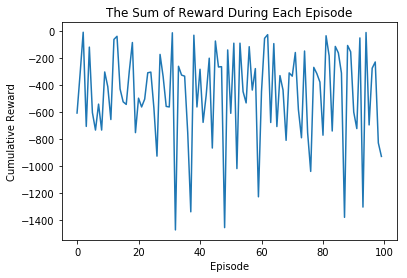

In [121]:
## Plot reward
plot_total_reward(total_reward)

### Run an Q-Agent

In [146]:
## Run
env.reset()
agent = Q_Agent(env,0.01,1,0.05)
total_reward = run(env,agent,trials = 5000,max_steps_per_episode=200,learn=True)

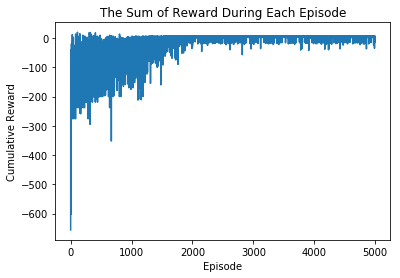

In [147]:
## Plot reward
plot_total_reward(total_reward)

### Results and Discussion

Compare the result from a dump agent, as a based line, and the q-agent with different parameters.

Q Learning จะเป็นการนำ current state, reward มาคำนวนตามสูตร เพื่อปรับค่า weight ของแต่ละช่องให้ model เลือกว่าควรจะทำอย่างใน State นั้น ๆ  

### Show Q-Table

Show the agent's Q-table using to make a decision.

In [130]:
def Viz_q_table(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            Viz_q_table(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))

In [135]:
Viz_q_table(agent.q_table)

(7, 3)
	left
		-5.137443988298443
	right
		-5.24985310627288
	up
		-5.138155844705662
	down
		-5.138984748187179
(6, 9)
	left
		15.949630420823645
	right
		16.9579979652329
	up
		15.95702900218625
	down
		17.999999999999467
(1, 3)
	left
		-5.076548502282432
	right
		-7.057627952899909
	up
		-6.065272466088064
	down
		6.999051256133547
(4, 8)
	left
		-1.3125418723102171
	right
		4.100456359391981
	up
		-1.0448623351188107
	down
		-1.0395318507874107
(3, 0)
	left
		-6.089040316697622
	right
		-5.8388505350067685
	up
		-6.081815373981883
	down
		-6.077890233935025
(2, 8)
	left
		-2.018776315352776
	right
		-2.014726778198583
	up
		-2.101041911542067
	down
		-1.9609888980665475
(9, 8)
	left
		0.1657878254373512
	right
		17.648600373151453
	up
		-0.598141405259604
	down
		0.026091370838968946
(8, 0)
	left
		-5.259429937634271
	right
		-5.257993223078465
	up
		-5.261919849582547
	down
		-5.2576339874705935
(0, 7)
	left
		-0.4
	right
		-0.5968556401513968
	up
		-0.4
	down
		-0.598706473861259